In [75]:
import splitfolders
splitfolders.ratio("lung_colon_image_set/lung_image_sets","data",ratio = (0.995, 0.005))

In [79]:
import os
len(os.listdir("data/val/lung_scc"))

50

In [96]:
import torch
from torch.utils.data import DataLoader
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import ImageFolder
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
])
batch_size = 70
train_set = ImageFolder("data/train", transform = transform)
val_set = ImageFolder("data/val", transform = transform)
loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_set, batch_size = 75)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


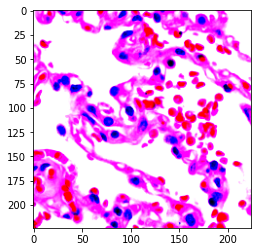

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


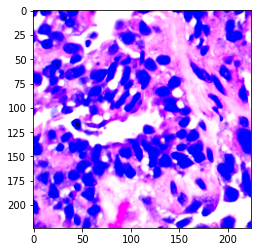

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


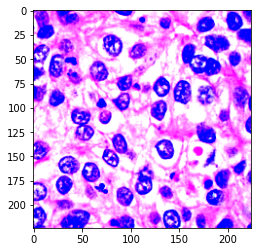

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


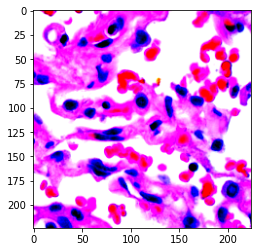

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


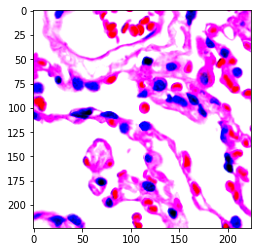

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


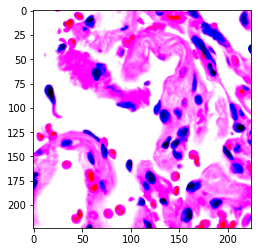

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


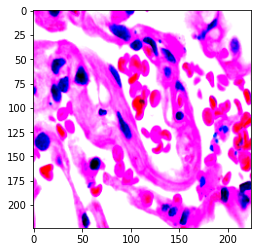

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [45]:
import matplotlib.pyplot as plt
try:
    for i in loader:
        img = i[0][0].permute(1, 2, 0)
        plt.imshow(img)
        plt.show()
except KeyboardInterrupt:
    None

In [102]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25088,5000)
        self.ac1 = nn.PReLU(1, 0.01)
        self.fc2 = nn.Linear(2048,5000)
        self.fc3 = nn.Linear(5000, 3)
        self.mob = nn.Sequential(*(list(models.vgg16(pretrained = True).children())[:-1]))
        self.resnet = nn.Sequential(*(list(models.resnet50(pretrained = True).children())[:-1]))
    def forward(self, data):
        with torch.no_grad():
            self.mob.cuda()
            data = data.cuda()
            x = self.mob(data)#memory trick because I cannot fit both vgg and resnet on my gpu memory
            self.mob.cpu()
            torch.cuda.empty_cache()
            resnet = self.resnet.cuda()
            x = x.reshape(data.shape[0], -1).cpu(), self.resnet(data).reshape(data.shape[0], -1).cpu()
            resnet.cpu()
            del data
            torch.cuda.empty_cache()
        x = torch.add(self.fc1(x[0]), self.fc2(x[1]))
        x = self.ac1(x)
        x = self.fc3(x)
        return x
model = net()

In [98]:
def evaluate(model, loader):
    with torch.no_grad():
        output = []
        target = []
        for batch,target_val in loader:
                with torch.no_grad():
                    output.append(model(batch))
                    target.append(target_val)
        output = torch.cat(output)
        target = torch.cat(target)
        loss = criterion(output, target)
        acc = (torch.sum(torch.argmax(output, dim = 1)==target)/output.shape[0]).item()
        torch.cuda.empty_cache()
        print("Validation Loss",loss.item())
        print("Validation Accuracy", acc, "\n")
        return loss

Loss 1.1129100322723389
Accuracy 0.22857142984867096
Validation Loss 1.0995686054229736
Validation Accuracy 0.3733333349227905 

Loss 12.274882316589355
Accuracy 0.3285714387893677
Validation Loss 11.80174446105957
Validation Accuracy 0.35333332419395447 

Loss 8.109832763671875
Accuracy 0.5
Validation Loss 9.402451515197754
Validation Accuracy 0.5 

Loss 4.197996139526367
Accuracy 0.800000011920929
Validation Loss 5.416289329528809
Validation Accuracy 0.7133333086967468 

Loss 6.395700931549072
Accuracy 0.7428571581840515
Validation Loss 7.45552396774292
Validation Accuracy 0.6866666674613953 

Loss 2.5201497077941895
Accuracy 0.800000011920929
Validation Loss 2.449704885482788
Validation Accuracy 0.8199999928474426 

Loss 1.1073600053787231
Accuracy 0.8999999761581421
Validation Loss 1.3036203384399414
Validation Accuracy 0.8399999737739563 

Loss 2.151376247406006
Accuracy 0.8714285492897034
Validation Loss 3.6430375576019287
Validation Accuracy 0.7666666507720947 

Loss 6.292502403

Validation Loss 0.15666049718856812
Validation Accuracy 0.95333331823349 

Loss 0.043907858431339264
Accuracy 1.0
Validation Loss 0.1567298024892807
Validation Accuracy 0.95333331823349 

Loss 0.1432681530714035
Accuracy 0.9571428298950195
Validation Loss 0.1590973436832428
Validation Accuracy 0.95333331823349 

Loss 0.11367557942867279
Accuracy 0.9142857193946838
Validation Loss 0.1543341428041458
Validation Accuracy 0.95333331823349 

Loss 0.07609164714813232
Accuracy 0.9571428298950195
Validation Loss 0.15192478895187378
Validation Accuracy 0.95333331823349 

Loss 0.1775568127632141
Accuracy 0.9285714030265808
Validation Loss 0.1465310901403427
Validation Accuracy 0.9599999785423279 

Loss 0.17963482439517975
Accuracy 0.9428571462631226
Validation Loss 0.14499786496162415
Validation Accuracy 0.9599999785423279 

Loss 0.10345567762851715
Accuracy 0.9714285731315613
Validation Loss 0.15430760383605957
Validation Accuracy 0.9466666579246521 

Loss 0.0435098297894001
Accuracy 1.0
Valida

Loss 0.05508347600698471
Accuracy 0.9857142567634583
Validation Loss 0.1005667895078659
Validation Accuracy 0.9599999785423279 

Loss 0.018292805179953575
Accuracy 1.0
Validation Loss 0.10168001800775528
Validation Accuracy 0.9666666388511658 

Loss 0.024440402165055275
Accuracy 0.9857142567634583
Validation Loss 0.10687451809644699
Validation Accuracy 0.9599999785423279 

Loss 0.06752320379018784
Accuracy 0.9714285731315613
Validation Loss 0.11437002569437027
Validation Accuracy 0.95333331823349 

Loss 0.11068123579025269
Accuracy 0.9571428298950195
Validation Loss 0.11457228660583496
Validation Accuracy 0.95333331823349 

Loss 0.12317272275686264
Accuracy 0.9571428298950195
Validation Loss 0.11163171380758286
Validation Accuracy 0.9666666388511658 

Loss 0.13223868608474731
Accuracy 0.9714285731315613
Validation Loss 0.12470728904008865
Validation Accuracy 0.95333331823349 

Loss 0.11962912231683731
Accuracy 0.9428571462631226
Validation Loss 0.1384211778640747
Validation Accuracy 0.

Validation Loss 0.13599203526973724
Validation Accuracy 0.9599999785423279 

Loss 0.13474522531032562
Accuracy 0.9571428298950195
Validation Loss 0.13522543013095856
Validation Accuracy 0.9666666388511658 

Loss 0.009507039561867714
Accuracy 1.0
Validation Loss 0.1270233690738678
Validation Accuracy 0.9733333587646484 

Loss 0.12942510843276978
Accuracy 0.9714285731315613
Validation Loss 0.13275696337223053
Validation Accuracy 0.9466666579246521 

Loss 0.026457658037543297
Accuracy 0.9857142567634583
Validation Loss 0.13232146203517914
Validation Accuracy 0.95333331823349 

Loss 0.04819856211543083
Accuracy 0.9857142567634583
Validation Loss 0.13188818097114563
Validation Accuracy 0.9399999976158142 

Loss 0.14479176700115204
Accuracy 0.9428571462631226
Validation Loss 0.11897099763154984
Validation Accuracy 0.9399999976158142 

Loss 0.07349101454019547
Accuracy 0.9857142567634583
Validation Loss 0.08638565987348557
Validation Accuracy 0.95333331823349 

Loss 0.04755712300539017
Accura

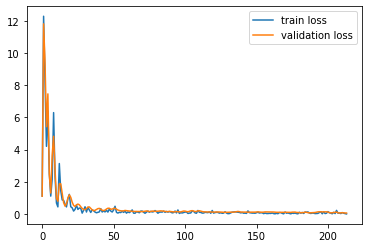

Time:  1613273965.1945064
Loss 0.019382739439606667
Accuracy 0.9857142567634583
Validation Loss 0.06714186072349548
Validation Accuracy 0.9866666793823242 

Loss 0.03357291594147682
Accuracy 0.9857142567634583
Validation Loss 0.0751306340098381
Validation Accuracy 0.9800000190734863 

Loss 0.038346316665410995
Accuracy 0.9857142567634583
Validation Loss 0.07210720330476761
Validation Accuracy 0.9800000190734863 

Loss 0.019906312227249146
Accuracy 0.9857142567634583
Validation Loss 0.06803718209266663
Validation Accuracy 0.9866666793823242 

Loss 0.012081915512681007
Accuracy 1.0
Validation Loss 0.06845065951347351
Validation Accuracy 0.9866666793823242 

Loss 0.01587763987481594
Accuracy 1.0
Validation Loss 0.07016193866729736
Validation Accuracy 0.9800000190734863 

Loss 0.015902740880846977
Accuracy 1.0
Validation Loss 0.0731278583407402
Validation Accuracy 0.9800000190734863 

Loss 0.021787839010357857
Accuracy 1.0
Validation Loss 0.07250265777111053
Validation Accuracy 0.973333358

Validation Loss 0.05429748073220253
Validation Accuracy 0.9800000190734863 

Loss 0.0042479089461266994
Accuracy 1.0
Validation Loss 0.04974528029561043
Validation Accuracy 0.9800000190734863 

Loss 0.019582193344831467
Accuracy 1.0
Validation Loss 0.05826272815465927
Validation Accuracy 0.9599999785423279 

Loss 0.03032911755144596
Accuracy 1.0
Validation Loss 0.06998433917760849
Validation Accuracy 0.9599999785423279 

Loss 0.019458092749118805
Accuracy 0.9857142567634583
Validation Loss 0.06597927957773209
Validation Accuracy 0.9599999785423279 

Loss 0.010740469209849834
Accuracy 1.0
Validation Loss 0.06903732568025589
Validation Accuracy 0.9599999785423279 

Loss 0.01176881417632103
Accuracy 1.0
Validation Loss 0.06521734595298767
Validation Accuracy 0.9599999785423279 

Loss 0.017077377066016197
Accuracy 1.0
Validation Loss 0.056727662682533264
Validation Accuracy 0.9666666388511658 

Loss 0.05960415303707123
Accuracy 0.9714285731315613
Validation Loss 0.04440383240580559
Validat

In [103]:
import torch.optim as optim
import math
import time
train_arr = []
val_arr = []
opt = optim.Adam(model.parameters(), 0.001)
criterion = nn.CrossEntropyLoss()
epochs = 10
try:
    seconds = time.time()
    for epoch in range(epochs):
        for batch,target in loader:
            model.zero_grad()
            output = model(batch)
            loss = criterion(output, target)
            print("Loss",loss.item())
            print("Accuracy", (torch.sum(torch.argmax(output, dim = 1)==target)/batch_size).item())
            val_loss = evaluate(model, val_loader)
            train_arr.append(loss.item())
            val_arr.append(val_loss.item())
            loss.backward()
            opt.step()
        plt.plot(range(len(train_arr)), train_arr, label = "train loss")#plot graph at epoch end
        plt.plot(range(len(val_arr)), val_arr, label = "validation loss")
        plt.legend()
        plt.show()
        print("Time: ",seconds)
except KeyboardInterrupt:
    None